In [42]:
from pandas_datareader import data as pdr
import yfinance as yf
%matplotlib inline
import matplotlib.pyplot as plt

In [43]:
# 데이터 불러오기
yf.pdr_override()

In [52]:
# 나스닥 지수 심볼 IXIC
nasdaq = pdr.get_data_yahoo('^IXIC', start='2022-01-01')
nasdaq.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-31,15722.910156,15777.429688,15643.940430,15644.969727,15644.969727,3379850000
2022-01-03,15732.500000,15832.799805,15644.089844,15832.799805,15832.799805,4412130000
2022-01-04,15852.139648,15852.139648,15512.410156,15622.719727,15622.719727,5109270000
2022-01-05,15547.160156,15586.299805,15095.179688,15100.169922,15100.169922,5011990000
2022-01-06,15024.150391,15198.450195,14914.870117,15080.860352,15080.860352,4774740000
2022-01-07,15095.719727,15171.019531,14877.629883,14935.900391,14935.900391,4229270000
2022-01-10,14751.780273,14953.849609,14530.230469,14942.830078,14942.830078,5303230000
2022-01-11,14919.259766,15158.709961,14837.629883,15153.450195,15153.450195,4378660000
2022-01-12,15263.099609,15319.030273,15117.290039,15188.389648,15188.389648,4321180000


In [53]:
# nasdaq Datatime 1971-02-05 ~ 2022-07-21
nasdaq.index

DatetimeIndex(['2021-12-31', '2022-01-03', '2022-01-04', '2022-01-05',
               '2022-01-06', '2022-01-07', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13',
               ...
               '2022-07-08', '2022-07-11', '2022-07-12', '2022-07-13',
               '2022-07-14', '2022-07-15', '2022-07-18', '2022-07-19',
               '2022-07-20', '2022-07-21'],
              dtype='datetime64[ns]', name='Date', length=139, freq=None)

In [54]:
# 시가 고가 저가 종가 
nasdaq.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

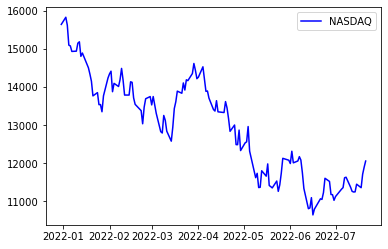

In [55]:
# 그래프 그리기
plt.plot(nasdaq.index, nasdaq.Close, 'b', label='NASDAQ')
plt.legend(loc='best')
plt.show()

### 일간 변동률

In [56]:
# 일간 변동률 (data percentage change)
nasdaq_dpc = (nasdaq['Close'] / nasdaq['Close'].shift(1)-1)*100
nasdaq_dpc.head(10)

Date
2021-12-31         NaN
2022-01-03    1.200578
2022-01-04   -1.326866
2022-01-05   -3.344807
2022-01-06   -0.127877
2022-01-07   -0.961218
2022-01-10    0.046396
2022-01-11    1.409506
2022-01-12    0.230571
2022-01-13   -2.512314
Name: Close, dtype: float64

In [57]:
# 첫 번째 데이터 NaN -> 0
nasdaq_dpc.iloc[0] = 0

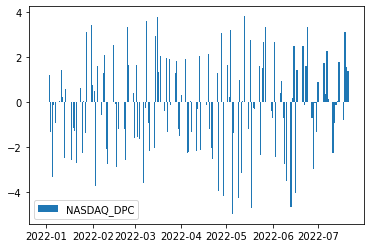

In [67]:
plt.bar(nasdaq_dpc.index,nasdaq_dpc, label='NASDAQ_DPC')
plt.legend(loc='best')
plt.show()

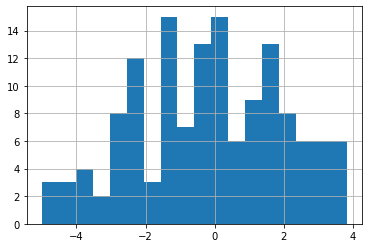

In [60]:
# 일간 변동률 분포 확인
# bins 는 x 축 구간 개수
plt.hist(nasdaq_dpc, bins=18)
plt.grid(True) # 격자 생성
plt.show()

In [64]:
# 일간 변동률 누적합 구하기
nasdaq_dpc_cs = nasdaq_dpc.cumsum()
nasdaq_dpc_cs[-1]

-22.917955828902883